# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

### Importing the training set

In [4]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [0]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [0]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [0]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [0]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [0]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

### Adding the output layer

In [0]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [0]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [23]:
regressor.fit(x=X_train, y=y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0475
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0038
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [0]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs)

In [0]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[763.96716]
 [761.3057 ]
 [761.7411 ]
 [763.2616 ]
 [766.5911 ]
 [772.29004]
 [777.30566]
 [779.07184]
 [779.13275]
 [778.8459 ]
 [778.72974]
 [778.64496]
 [778.58997]
 [779.16223]
 [780.06995]
 [784.5927 ]
 [791.2702 ]
 [798.2523 ]
 [801.6992 ]
 [797.0847 ]]


### Visualising the results

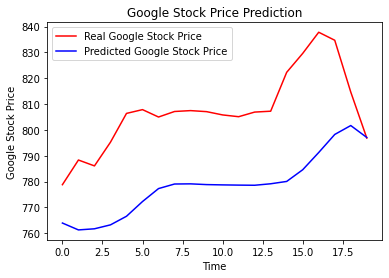

In [36]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()